In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('/Users/pintoza/Desktop/dev/data-science/sales_optimization/data/processed/df_processed.csv')

df.head()

,order_number,sales_channel,warehouse_code,procured_date,order_date,ship_date,delivery_date,sales_team_id,customer_id,store_id,product_id,order_quantity,discount_applied,unit_cost,unit_price
0,101,In-Store,4,2017-12-31,2018-05-31,2018-06-14,2018-06-19,6,15,259,12,5,0.075,1001,1963
1,102,Online,3,2017-12-31,2018-05-31,2018-06-22,2018-07-02,14,20,196,27,3,0.075,3349,3940
2,103,Distributor,4,2017-12-31,2018-05-31,2018-06-21,2018-07-01,21,16,213,16,1,0.050,781,1776
3,104,Wholesale,3,2017-12-31,2018-05-31,2018-06-02,2018-06-07,28,48,107,23,8,0.075,1465,2325
4,105,Distributor,3,2018-04-10,2018-05-31,2018-06-16,2018-06-26,22,49,111,26,8,0.100,1476,1822


In [10]:
sales_channel_stats = df.groupby('sales_channel').agg({'unit_price': ['sum', 'mean'], 'order_quantity': ['sum', 'mean']}).reset_index()

sales_channel_stats

sales_channel unit_price              order_quantity          
                       sum         mean            sum      mean
0   Distributor    3201761  2328.553455           6287  4.572364
1      In-Store    7487147  2270.208308          14878  4.511219
2        Online    5544855  2286.538144          10897  4.493608
3     Wholesale    2021950  2264.221725           4100  4.591265

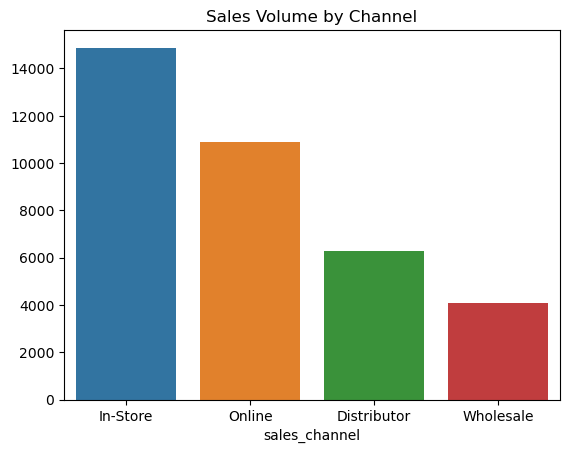

In [11]:
sales_volume_by_channel = df.groupby('sales_channel')['order_quantity'].sum().sort_values(ascending=False)
sns.barplot(x=sales_volume_by_channel.index, y=sales_volume_by_channel.values)
plt.title('Sales Volume by Channel')
plt.savefig('/Users/pintoza/Desktop/dev/data-science/sales_optimization/reports/sales_channel_comparison/sales_volume_by_channel.png')

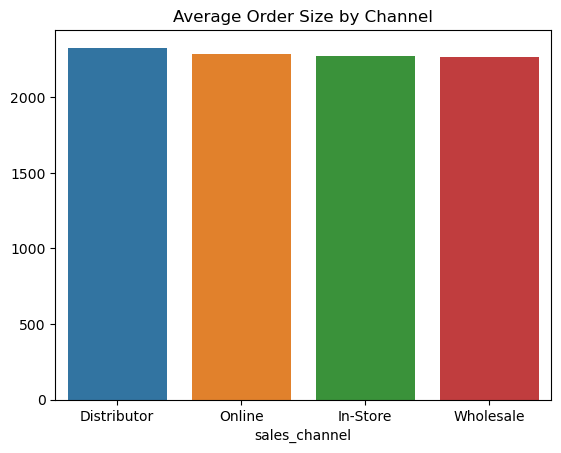

In [12]:
avg_order_by_channel = df.groupby('sales_channel')['unit_price'].mean().sort_values(ascending=False)
sns.barplot(x=avg_order_by_channel.index, y=avg_order_by_channel.values)
plt.title('Average Order Size by Channel')
plt.savefig('/Users/pintoza/Desktop/dev/data-science/sales_optimization/reports/sales_channel_comparison/average_order_size_by_channel.png')

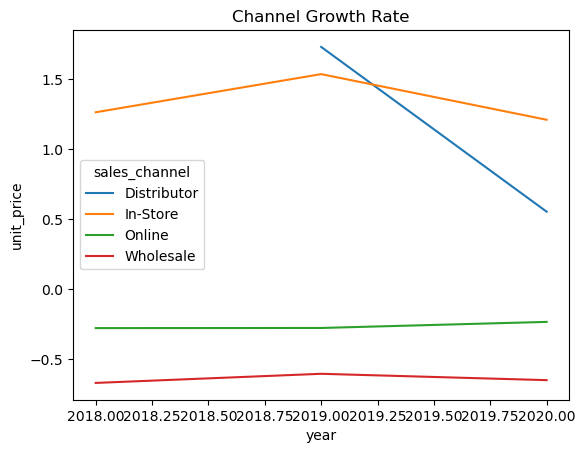

In [16]:
# Convert 'order_date' to datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Now you should be able to extract the year
df['year'] = df['order_date'].dt.year

# Proceed with the rest of the code for channel growth rate
channel_growth_df = df.groupby(['year', 'sales_channel'])['unit_price'].sum().pct_change().reset_index()

# Now plot
sns.lineplot(x='year', y='unit_price', hue='sales_channel', data=channel_growth_df)
plt.title('Channel Growth Rate')
plt.savefig('/Users/pintoza/Desktop/dev/data-science/sales_optimization/reports/sales_channel_comparison/channel_growth_rate.png')

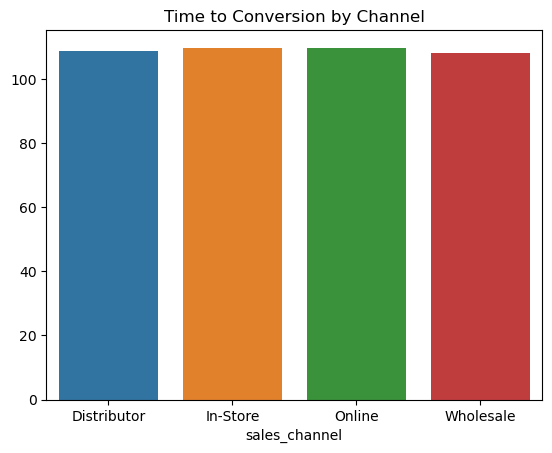

In [18]:
# Convert both columns to pandas datetime objects
df['order_date'] = pd.to_datetime(df['order_date'])
df['procured_date'] = pd.to_datetime(df['procured_date'])

# Now compute 'time_to_conversion'
df['time_to_conversion'] = (df['order_date'] - df['procured_date']).dt.days
time_to_conversion_by_channel = df.groupby('sales_channel')['time_to_conversion'].mean()

# Plot
sns.barplot(x=time_to_conversion_by_channel.index, y=time_to_conversion_by_channel.values)
plt.title('Time to Conversion by Channel')
plt.savefig('/Users/pintoza/Desktop/dev/data-science/sales_optimization/reports/sales_channel_comparison/time_to_conversion_by_channel.png')

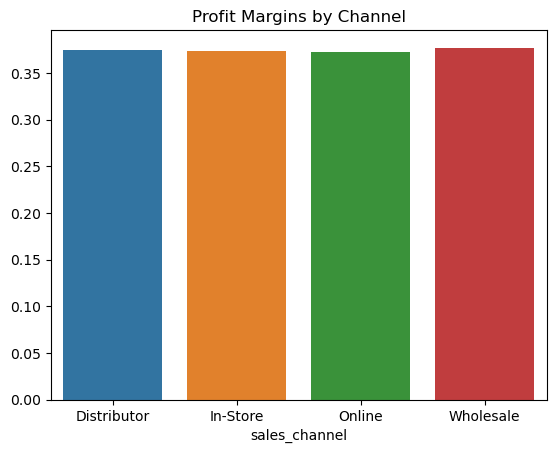

In [19]:
df['profit_margin'] = (df['unit_price'] - df['unit_cost']) / df['unit_price']
profit_margin_by_channel = df.groupby('sales_channel')['profit_margin'].mean()
sns.barplot(x=profit_margin_by_channel.index, y=profit_margin_by_channel.values)
plt.title('Profit Margins by Channel')
plt.savefig('/Users/pintoza/Desktop/dev/data-science/sales_optimization/reports/sales_channel_comparison/profit_margins_by_channel.png')

In [21]:
sales_volume_by_channel = df.groupby('sales_channel')['order_quantity'].sum().sort_values(ascending=False)
# Convert to dictionary for easier insight formulation
sales_volume_dict = sales_volume_by_channel.to_dict()
sales_volume_dict

{'In-Store': 14878, 'Online': 10897, 'Distributor': 6287, 'Wholesale': 4100}

In [22]:
avg_order_by_channel = df.groupby('sales_channel')['unit_price'].mean().sort_values(ascending=False)
avg_order_dict = avg_order_by_channel.to_dict()
avg_order_dict

{'Distributor': 2328.5534545454548,
 'Online': 2286.538144329897,
 'In-Store': 2270.2083080654943,
 'Wholesale': 2264.2217245240763}

In [23]:
df['year'] = df['order_date'].dt.year
channel_growth = df.groupby(['year', 'sales_channel'])['unit_price'].sum().pct_change().dropna()
channel_growth_dict = channel_growth.to_dict()
channel_growth_dict

{(2018, 'In-Store'): 1.2631153599891727,
 (2018, 'Online'): -0.27671398299602357,
 (2018, 'Wholesale'): -0.6677701824935324,
 (2019, 'Distributor'): 1.7292319767970556,
 (2019, 'In-Store'): 1.5351753550679272,
 (2019, 'Online'): -0.2757331223117926,
 (2019, 'Wholesale'): -0.6026791512901033,
 (2020, 'Distributor'): 0.5538695813121675,
 (2020, 'In-Store'): 1.2096772821250203,
 (2020, 'Online'): -0.23237422159681598,
 (2020, 'Wholesale'): -0.6479444914889048}

In [24]:
df['time_to_conversion'] = (df['order_date'] - df['procured_date']).dt.days
time_to_conversion_by_channel = df.groupby('sales_channel')['time_to_conversion'].mean()
time_to_conversion_dict = time_to_conversion_by_channel.to_dict()
time_to_conversion_dict

{'Distributor': 108.59272727272727,
 'In-Store': 109.5139478471801,
 'Online': 109.71546391752577,
 'Wholesale': 107.9619260918253}

In [25]:
df['profit_margin'] = (df['unit_price'] - df['unit_cost']) / df['unit_price']
profit_margin_by_channel = df.groupby('sales_channel')['profit_margin'].mean()
profit_margin_dict = profit_margin_by_channel.to_dict()
profit_margin_dict

{'Distributor': 0.3747914896903619,
 'In-Store': 0.3729568856702698,
 'Online': 0.372852056850933,
 'Wholesale': 0.377085044453141}

In [26]:
from reportlab.lib.pagesizes import letter, landscape
from reportlab.lib import colors
from reportlab.lib.pagesizes import letter
from reportlab.platypus import SimpleDocTemplate, Table, TableStyle, Paragraph, Image
from reportlab.lib.styles import getSampleStyleSheet

# Create a PDF file
pdf = SimpleDocTemplate(
    "/Users/pintoza/Desktop/dev/data-science/sales_optimization/reports/insights/Sales_Channel_Analysis.pdf",
    pagesize=letter
)

# Set the styles
styles = getSampleStyleSheet()
styleN = styles["BodyText"]

# Add Title
elements = []
elements.append(Paragraph("Sales Channel Analysis Insights", styles["Heading1"]))

# Insert insights text
insights_text = """
1. Sales Volume by Channel: <br/>
   - In-Store: 14,878 <br/>
   - Online: 10,897 <br/>
   - Distributor: 6,287 <br/>
   - Wholesale: 4,100 <br/>
   
<br/>

2. Average Order Size by Channel: <br/>
   - Distributor: 2,328 <br/>
   - Online: 2,286 <br/>
   - In-Store: 2,270 <br/>
   - Wholesale: 2,264 <br/>

<br/>

3. Channel Growth Rate: <br/>
   - Only the distributor sales channel has seen a significant growth change (decline) throughout the measured period <br/>
   
<br/>

4. Time to Conversion by Channel <br/>
   - Time to conversion by day is surprisingly consistent across all channels at around 108 days on average <br/>

<br/>

5. Profit Margins by Channel <br/>
   - Profit margin is consistent at around 37% across all channels <br/>
"""
elements.append(Paragraph(insights_text, styleN))

# Insert Images (Your charts saved as PNG files)
img_path1 = "/Users/pintoza/Desktop/dev/data-science/sales_optimization/reports/sales_channel_comparison/sales_volume_by_channel.png"
img1 = Image(img_path1, width=200, height=200)
elements.append(img1)

img_path2 = "/Users/pintoza/Desktop/dev/data-science/sales_optimization/reports/sales_channel_comparison/average_order_size_by_channel.png"
img2 = Image(img_path2, width=200, height=200)
elements.append(img2)

img_path3 = "/Users/pintoza/Desktop/dev/data-science/sales_optimization/reports/sales_channel_comparison/channel_growth_rate.png"
img3 = Image(img_path3, width=200, height=200)
elements.append(img3)

img_path4 = "/Users/pintoza/Desktop/dev/data-science/sales_optimization/reports/sales_channel_comparison/time_to_conversion_by_channel.png"
img4 = Image(img_path4, width=200, height=200)
elements.append(img4)

img_path5 = "/Users/pintoza/Desktop/dev/data-science/sales_optimization/reports/sales_channel_comparison/profit_margins_by_channel.png"
img5 = Image(img_path5, width=200, height=200)
elements.append(img5)

# Generate PDF
pdf.build(elements)